In [2]:
!pip freeze | findstr scikit-learn

scikit-learn==1.1.1


In [3]:
import pickle
import pandas as pd

In [4]:
with open('model.bin', 'rb') as f_in:
    dv, lr = pickle.load(f_in)

C:\Users\User\anaconda3\envs\mlflow_test\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DictVectorizer from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\User\anaconda3\envs\mlflow_test\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LinearRegression from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [5]:
categorical = ['PUlocationID', 'DOlocationID']

def read_data(filename):
    df = pd.read_parquet(filename)
    
    df['duration'] = df.dropOff_datetime - df.pickup_datetime
    df['duration'] = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

    df[categorical] = df[categorical].fillna(-1).astype('int').astype('str')
    
    return df

In [7]:
df = read_data('https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-02.parquet')

In [8]:
dicts = df[categorical].to_dict(orient='records')
X_val = dv.transform(dicts)
y_pred = lr.predict(X_val)

## No 1

In [12]:
y_pred.mean()

16.191691679979066

### NO 2

In [45]:
df

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration,ride_id
1,B00021,2021-02-01 00:55:40,2021-02-01 01:06:20,173,82,None,B00021,10.666667,2021/02_1
2,B00021,2021-02-01 00:14:03,2021-02-01 00:28:37,173,56,None,B00021,14.566667,2021/02_2
3,B00021,2021-02-01 00:27:48,2021-02-01 00:35:45,82,129,None,B00021,7.950000,2021/02_3
4,B00037,2021-02-01 00:12:50,2021-02-01 00:26:38,-1,225,None,B00037,13.800000,2021/02_4
5,B00037,2021-02-01 00:00:37,2021-02-01 00:09:35,-1,61,None,B00037,8.966667,2021/02_5
...,...,...,...,...,...,...,...,...,...
1037687,B03282,2021-02-28 23:01:16,2021-02-28 23:14:48,-1,31,None,B01717,13.533333,2021/02_1037687
1037688,B03282,2021-02-28 23:36:10,2021-02-28 23:47:38,-1,169,None,B01717,11.466667,2021/02_1037688
1037689,B03285,2021-02-28 23:18:36,2021-02-28 23:43:59,28,171,None,B03285,25.383333,2021/02_1037689
1037690,B03285,2021-02-28 23:26:34,2021-02-28 23:44:37,16,252,None,B03285,18.050000,2021/02_1037690


In [24]:
year = '2021'
month = '02'
df['ride_id'] = f'{year}/{month}_' + df.index.astype('str')

In [28]:
df_result = df[['ride_id']].copy()
df_result['predictions'] = y_pred

In [29]:
df_result

,ride_id,predictions
1,2021/02_1,14.539865
2,2021/02_2,13.740422
3,2021/02_3,15.593339
4,2021/02_4,15.188118
5,2021/02_5,13.817206
...,...,...
1037687,2021/02_1037687,12.433246
1037688,2021/02_1037688,12.910885
1037689,2021/02_1037689,15.834923
1037690,2021/02_1037690,16.783176


In [31]:
output_file = 'predictions.parquet'

df_result.to_parquet(
    output_file,
    engine='pyarrow',
    compression=None,
    index=False
)

In [44]:
import os
("size parquet output : {} MB".format(os.path.getsize("./predictions.parquet")/10**6))

'size parquet output : 19.71144 MB'

## No 3

python predictions.py

## No.4

First hash of scikit-learn : sha256:08ef968f6b72033c16c479c966bf37ccd49b06ea91b765e1cc27afefe723920b

## No. 5

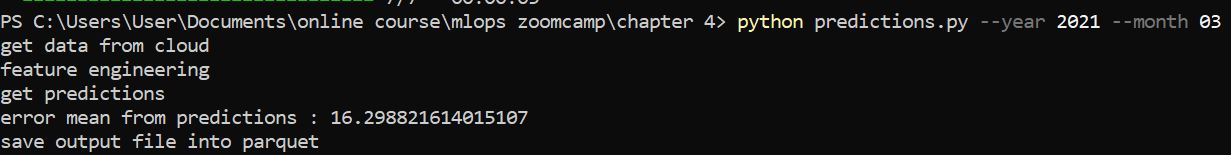